# Test for the TomoBox

In [1]:
import tomobox
import simulate
import numpy
%pylab inline

In [2]:
# Initialize a synthetic sinogram
im_sz = 256

tomo = tomobox.projections()
tomo.meta.geometry.modifiers_reset()

tomo.io.manual_init(src2obj = 100, det2obj = 100, theta_n = im_sz, 
                    theta_range = [0, 2*numpy.pi], det_width = im_sz, 
                    det_height = im_sz, det_pixel = [0.1, 0.1])

In [3]:
# Simulate data:
vol0 = simulate.phantom.shepp3d(im_sz)
tomo.meta.geometry.rotation_axis_shift(12.3)

simulate.tomography.project(vol0, tomo)

tomo.meta.geometry.modifiers_reset()

# Find center:

In [4]:
tomo._data_sampling = 2

tomo.reconstruct._initialize_ramp_filter(power = 2)
tomo.reconstruct._projection_filter.shape

(256, 129)

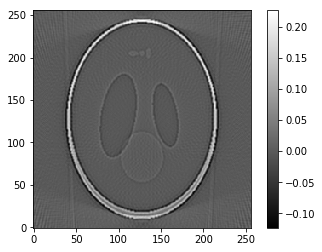

In [5]:
tomo._data_sampling = 1

shift = 12.3 / tomo._data_sampling + 0

tomo.meta.geometry.rotation_axis_shift(shift)

#tomo.reconstruct.initialize_reconstruction_mask()
tomo.reconstruct._initialize_ramp_filter(power = 2)

vol = tomo.reconstruct.FDK()

vol.display.slice(im_sz//2//tomo._data_sampling, 0)
print(tomo.reconstruct._modifier_l2cost(shift))

In [6]:
import time

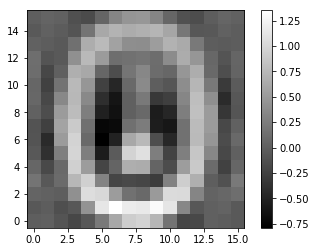

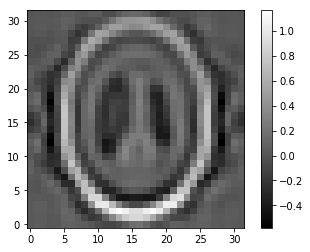

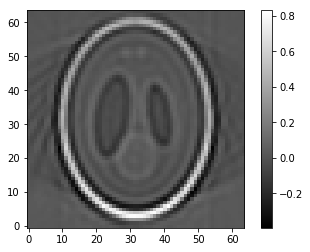

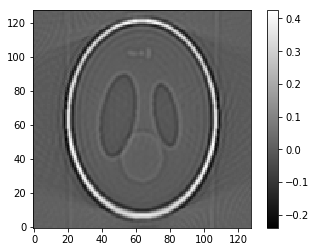

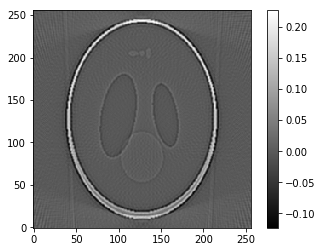

12.294921875

In [7]:
t0 = time.time()
r = tomo.reconstruct.optimize_rotation_center(subscale = 16, center_of_mass=False)

print('Time', time.time() - t0)
r

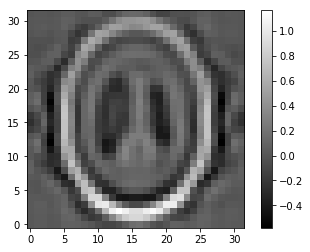

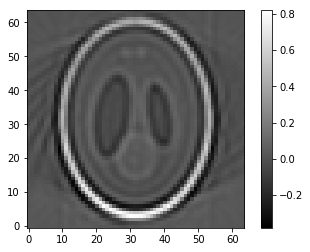

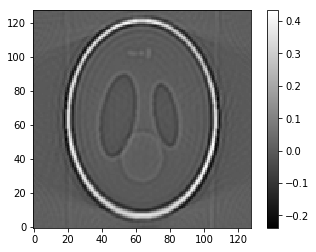

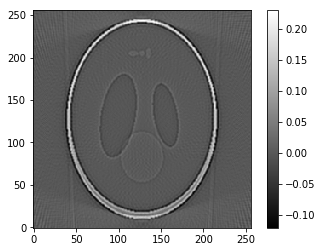

12.221978299691765

In [8]:
t0 = time.time()
r = tomo.reconstruct.optimize_rotation_center(subscale = 8, center_of_mass=False, full_search = True)

print('Time', time.time() - t0)
r

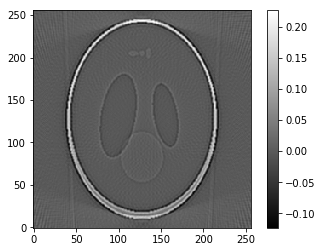

3.7351498257440717e-08

In [7]:
t0 = time.time()
r = tomo.reconstruct.optimize_geometry_modifier(subscale = 1, modifiers = 'det_rot')

print('Time', time.time() - t0)
r

In [8]:
#tomo.meta.geometry.rotation_axis_shift(12)
tomo.meta.geometry.modifiers

{'det_hrz': -6.15,
 'det_mag': 0,
 'det_rot': 3.7351498257440717e-08,
 'det_vrt': 0,
 'dtheta': 0,
 'src_hrz': -6.15,
 'src_mag': 0,
 'src_vrt': 0,
 'vol_x_rot': 0,
 'vol_x_tra': 0,
 'vol_y_rot': 0,
 'vol_y_tra': 0,
 'vol_z_rot': 0,
 'vol_z_tra': 0}